Let's load some 1D data and get some insight into it!

To keep this section nice and simple, the data generated is something I've thrown together. It's not just an analytic function from `scipy` - that would make it too easy - but I've made sure its not pathological.

Let's start with the imports to make sure we have everything right at the beginning. If this errors, `pip install` whichever dependency you don't have. If you have issues (especially on windows machines with numpy) try using `conda install`. For example, `conda install numpy`.

Also, if you want to get the same dark theme in your notebook as me, check out [jupyter-themes](https://github.com/dunovank/jupyter-themes).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
plt.rcParams['figure.figsize'] = [18, 7]

In [2]:
d1 = np.loadtxt("../../data/example_1.txt")
d2 = np.loadtxt("../../data/example_2.txt")
print(d1.shape, d2.shape)

(500,) (500,)


# Histogram Plots

* Normal plots
* Density and bins
* Customising styles

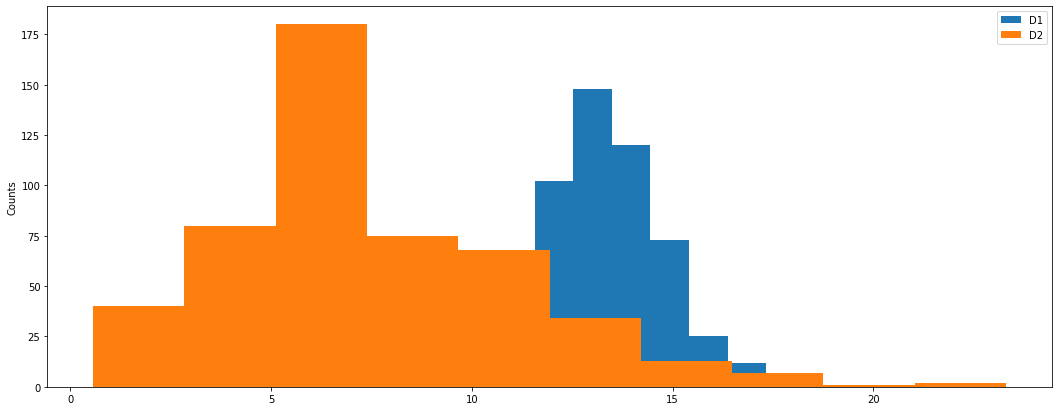

In [3]:
plt.hist(d1, label="D1")
plt.hist(d2, label="D2")
plt.legend()
plt.ylabel("Counts");

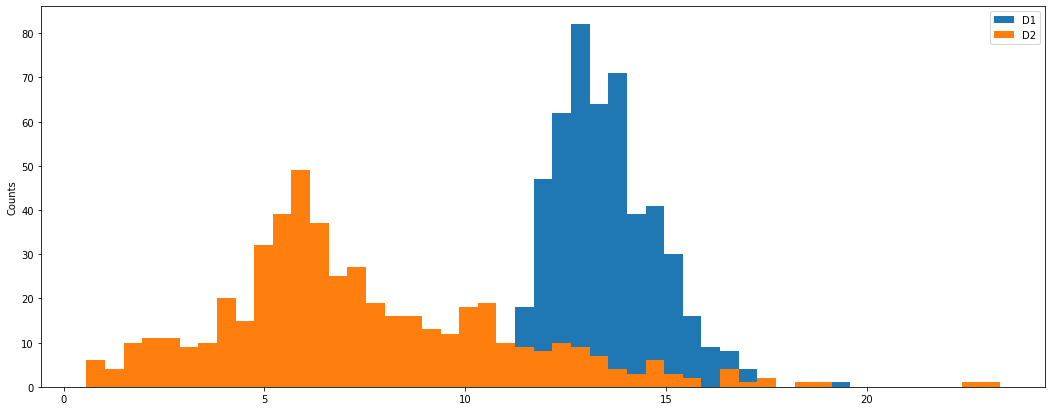

In [4]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1")
plt.hist(d2, bins=bins, label="D2")
plt.legend()
plt.ylabel("Counts");

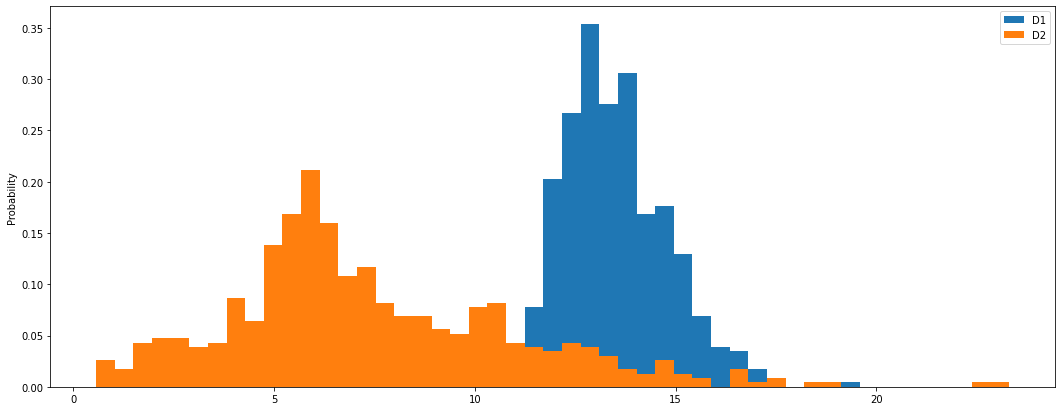

In [5]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1", density=True)
plt.hist(d2, bins=bins, label="D2", density=True)
plt.legend()
plt.ylabel("Probability");

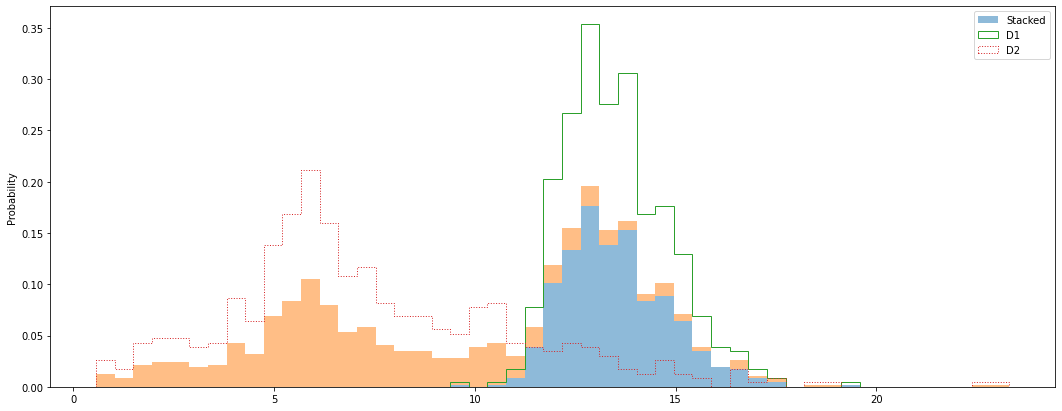

In [6]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, histtype="barstacked", alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype="step", lw=1)
plt.hist(d2, bins=bins, label="D2", density=True, histtype="step", ls=":")
plt.legend()
plt.ylabel("Probability");

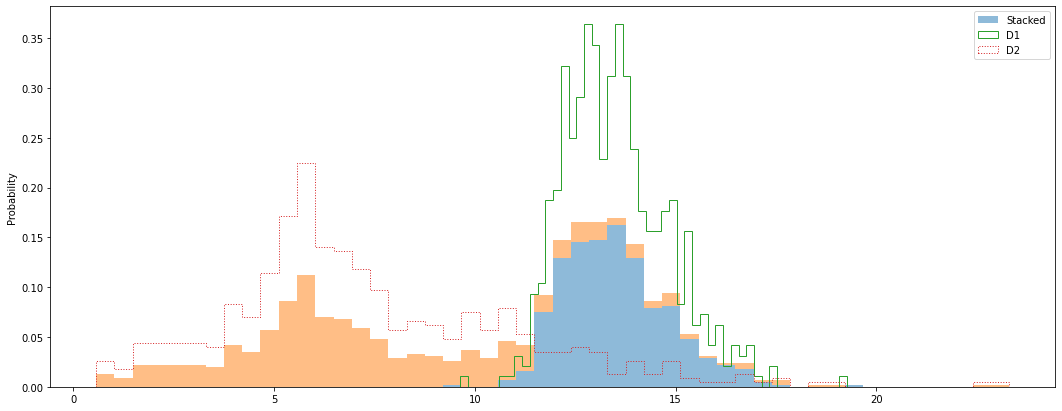

In [7]:
bins = 50
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, histtype="barstacked", alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype="step", lw=1)
plt.hist(d2, bins=bins, label="D2", density=True, histtype="step", ls=":")
plt.legend()
plt.ylabel("Probability");

*******
# Bee Swarm Plots

In [8]:
dataset = pd.DataFrame({
    "value": np.concatenate((d1, d2)),
    "type": np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


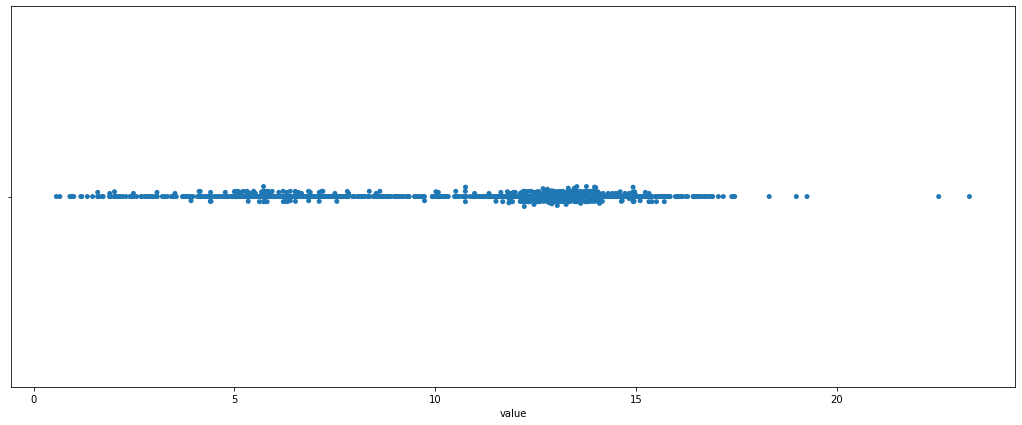

In [9]:
sb.swarmplot(dataset["value"])

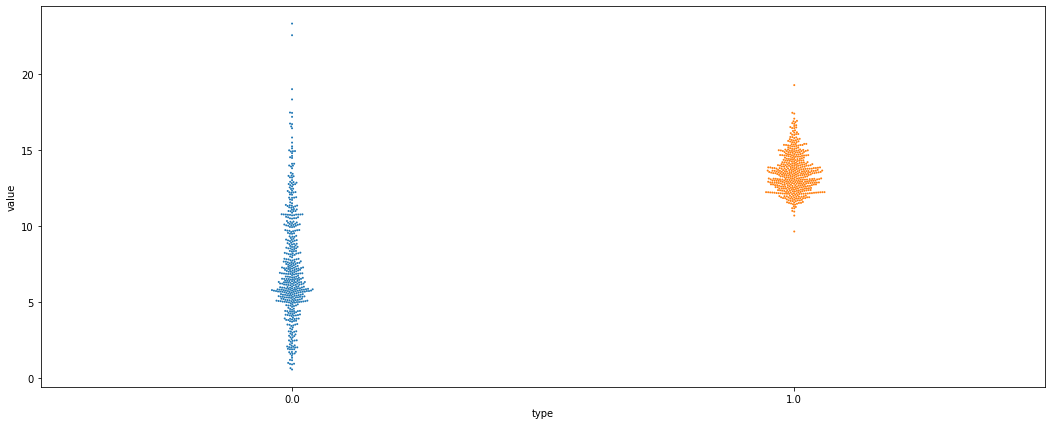

In [10]:
sb.swarmplot(x="type", y="value", data=dataset, size=2);

*****
# Box Plots

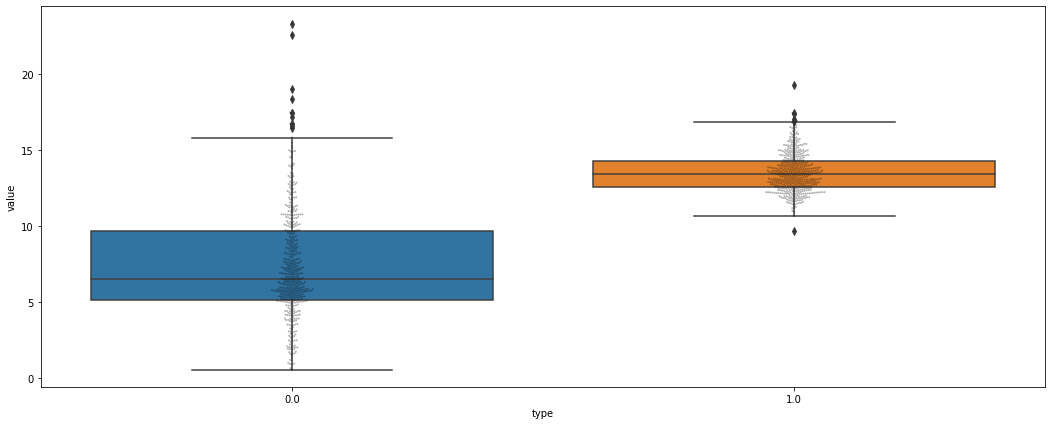

In [11]:
sb.boxplot(x="type", y="value", data=dataset, whis=1.5);
sb.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);

*****

# Violin Plots

Okay so a box plot really doesn't display too much does it. What if we want a hint more information?

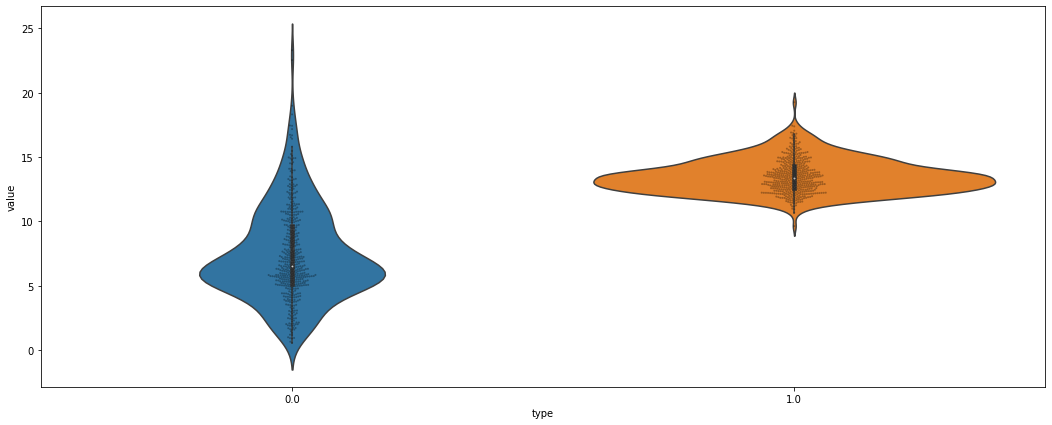

In [12]:
sb.violinplot(x="type", y="value", data=dataset);
sb.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);

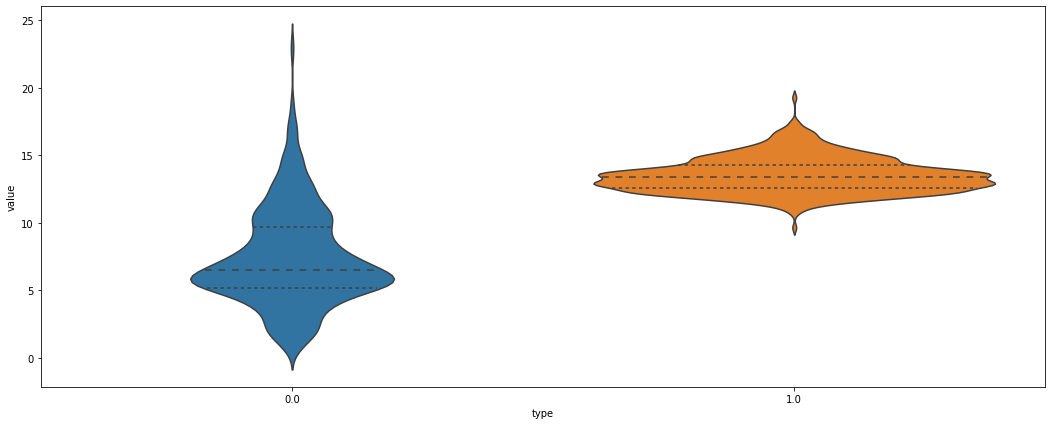

In [13]:
sb.violinplot(x="type", y="value", data=dataset, inner="quartile", bw=0.2);

******
# Describe

If you don't want plots and just some numbers, you might be looking for pandas' `describe` function.

In [14]:
df = pd.DataFrame({"Data1": d1, "Data2": d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
